In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# constants
attention_span = 3.0
switch_time = 0.5
n_timesteps = 1000

In [64]:
def modulate_attention(onset=3.0, attention_span=3.0, switch_time=0.5, max_t=10, n_timesteps=1000, rng=None):

    if rng is None:
        rng = np.random.default_rng()

    t = np.linspace(0, max_t, n_timesteps+1)
    a = np.zeros((n_timesteps+1, 1))
    dt = max_t / n_timesteps

    # Compute individual timestamps
    delay = onset + switch_time
    fixation = delay + attention_span
    release = fixation + switch_time


    for i in range(n_timesteps):
        if t[i] >= onset and t[i] < delay:
            a[i] = a[i-1] + dt / switch_time
        elif t[i] >= delay and t[i] < fixation:
            a[i] = 1
        elif t[i] >= fixation and t[i] < release:
            a[i] = a[i-1] - dt / switch_time
        else:
            a[i] = 0

    return a

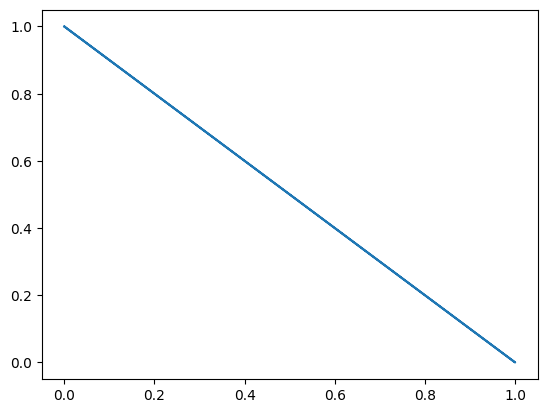

In [70]:
self_attention = modulate_attention()
joint_attention = 1 - self_attention